In [1]:
import HARK.ConsumptionSaving.ConsPortfolioModel as cpm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import sys

sys.path.append('.')

import hark_portfolio_agents as hpa

In [3]:
sys.path.append('../PNL/py')

import util as UTIL
import pnl as pnl

## How to use this code


### Initialize the agents to start

This is to set up the agent parameters and quantities used in the simulation.

In [4]:
## List of tuples: 
##  ( parameters, (i.e. coefficient of relative risk aversion CRRA)
##    number of agents represented,
##    ( initial risky percent, $$$ in risky asset, $$$ in riskless asset)
agent_classes = [
    ({'CRRA': 5.0}, 100, 1000), # Normal consumers
    ({'CRRA': 6.0}, 50,  1000),  # More risk-averse consumers
    ({'CRRA': 4.0}, 50,  1000)  #  Less risk-averse consumers
]


### parameters shared by all agents
ap = {
    'AdjustPrb' : 1.0, # probabability of rebalancing during simulation
    'aNrmInitStd' : 0.0,
    'pLvlInitMean' : 1.0, # initial distribution of permanent income
    'pLvlInitStd' : 0.0
}

In [5]:
agents = hpa.create_agents(agent_classes, ap)

/home/sb/.local/lib/python3.8/site-packages/HARK/distribution.py:97: RuntimeWarning: overflow encountered in exp
  draws = np.exp(self.mu) * np.ones(N)


In [6]:
agents[0].state_now["mNrmNow"]

array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf])

#### Test agent

This is a test agent used to test and demonstrate the functions below.

In [7]:
# test agent
agent = cpm.PortfolioConsumerType(
    AgentCount = 3,
    **ap
)
agent.solve()
agent.T_sim = 100
agent.track_vars += ['pLvlNow','mNrmNow','ShareNow','RiskyNow']
agent.initializeSim()
agent.simulate()

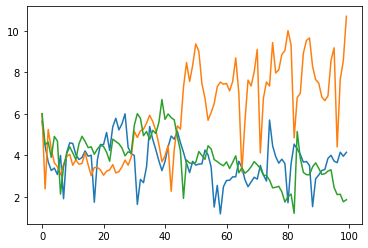

In [8]:
### This is not working for some reason!

plt.plot(agent.history['mNrmNow'] * agent.history['pLvlNow'])

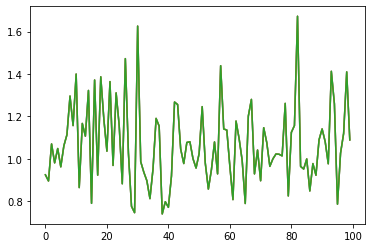

In [9]:
plt.plot(agent.history['RiskyNow'])

The normalize market assets of each agent at the current (final) stage of the simulation.

The function from normalized market assets to the proportion of assets allocated to the risky share.

### Synthetic price data

In the future, get this from the LiquidityModel.

For now, just use any array of prices with noise and drift.

In [10]:
## This is a dummy method that the ABM group
## needs to write to connect to the NetLogo
## model.

def run_market(buy_sell):
    config = UTIL.read_config(config_file="../PNL/macroliquidity.ini")
    pnl.run_NLsims(
        config,
        broker_buy_limit = buy_sell[0],
        broker_sell_limit = buy_sell[1])
    
def get_orders():
    # use run_market() first to create logs
    orders = pd.read_csv("../PNL/out/logs/LMallorders_90_5.csv", delimiter='\t')
    return orders

### Agents estimate return rate and volatility from historical data

The agents look at the most recent historical price data to form their expectations of the future.

This is a very simplified version of what could later be better specified in line with _adaptive expectations_:

https://en.wikipedia.org/wiki/Adaptive_expectations

### Demand function for the intermittent demand problem

In the intermittent demand problem, consumers take their current state and determine risky porfolio share of their assets to invest.

The agent responds to the price history by:
 - updating their current assets
 - updating their expectations of the risky asset
 - returning their risky share allocation.

Other aspects of the problem are fixed for now.

### Putting it all together

Each agent knows their old risky allocation, old risk free allocation, and the prices of the last quarter.

They computer their new market assets and then their new demand.

/home/sb/.local/lib/python3.8/site-packages/HARK/distribution.py:97: RuntimeWarning: overflow encountered in exp
  draws = np.exp(self.mu) * np.ones(N)


Getting risky asset demand for all agents


/home/sb/.local/lib/python3.8/site-packages/HARK/interpolation.py:836: RuntimeWarning: invalid value encountered in add
  y = (1.0 - alpha) * self.y_list[i - 1] + alpha * self.y_list[i]
/home/sb/.local/lib/python3.8/site-packages/HARK/interpolation.py:857: RuntimeWarning: invalid value encountered in multiply
  + self.slope_limit * x[above_upper_bound]


computing aggregate buy/sell orders
Initial Buy/Sell: (0, nan)
{'RiskyAvg': 0.2787286063569682, 'RiskyStd': 89.13019605578029}


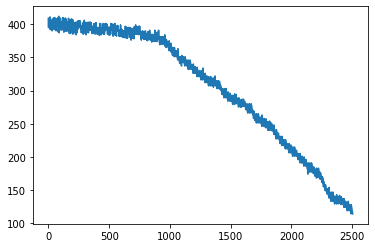

simulating macro agents
{'RiskyAvg': 0.2787286063569682, 'RiskyStd': 89.13019605578029}
Getting risky asset demand for all agents
computing aggregate buy/sell orders
Round 0 Buy/Sell: (0, nan)
{'RiskyAvg': 0.2787286063569682, 'RiskyStd': 89.13019605578029}


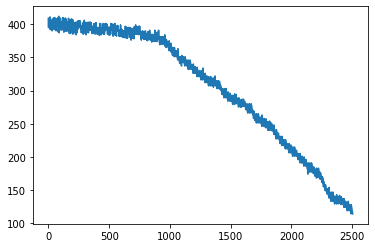

simulating macro agents
{'RiskyAvg': 0.2787286063569682, 'RiskyStd': 89.13019605578029}
Getting risky asset demand for all agents
computing aggregate buy/sell orders
Round 1 Buy/Sell: (0, nan)
{'RiskyAvg': 0.2787286063569682, 'RiskyStd': 89.13019605578029}


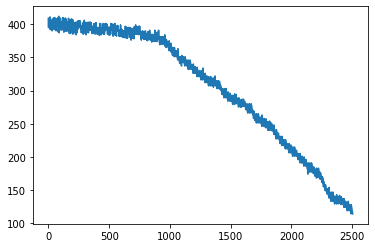

simulating macro agents
{'RiskyAvg': 0.2787286063569682, 'RiskyStd': 89.13019605578029}
Getting risky asset demand for all agents
computing aggregate buy/sell orders
Round 2 Buy/Sell: (0, nan)
{'RiskyAvg': 0.2787286063569682, 'RiskyStd': 89.13019605578029}


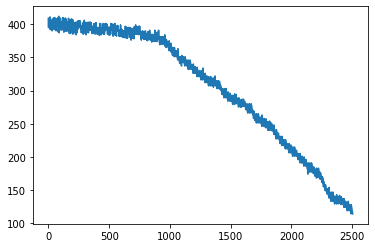

simulating macro agents
{'RiskyAvg': 0.2787286063569682, 'RiskyStd': 89.13019605578029}
Getting risky asset demand for all agents
computing aggregate buy/sell orders
Round 3 Buy/Sell: (0, nan)
{'RiskyAvg': 0.2787286063569682, 'RiskyStd': 89.13019605578029}


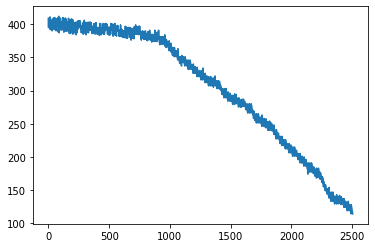

simulating macro agents
{'RiskyAvg': 0.2787286063569682, 'RiskyStd': 89.13019605578029}
Getting risky asset demand for all agents
computing aggregate buy/sell orders
Round 4 Buy/Sell: (0, nan)
{'RiskyAvg': 0.2787286063569682, 'RiskyStd': 89.13019605578029}


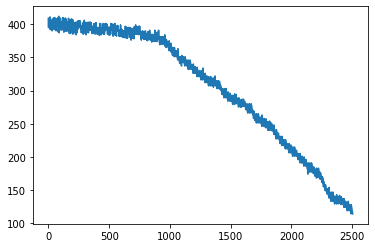

simulating macro agents
{'RiskyAvg': 0.2787286063569682, 'RiskyStd': 89.13019605578029}
Getting risky asset demand for all agents
computing aggregate buy/sell orders
Round 5 Buy/Sell: (0, nan)
{'RiskyAvg': 0.2787286063569682, 'RiskyStd': 89.13019605578029}


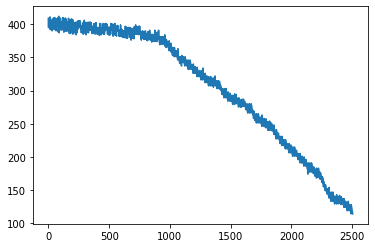

simulating macro agents
{'RiskyAvg': 0.2787286063569682, 'RiskyStd': 89.13019605578029}
Getting risky asset demand for all agents
computing aggregate buy/sell orders
Round 6 Buy/Sell: (0, nan)
{'RiskyAvg': 0.2787286063569682, 'RiskyStd': 89.13019605578029}


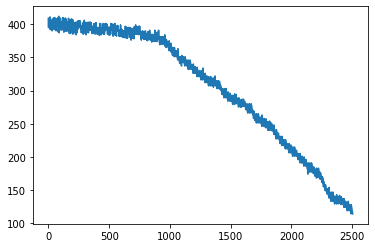

simulating macro agents
{'RiskyAvg': 0.2787286063569682, 'RiskyStd': 89.13019605578029}
Getting risky asset demand for all agents
computing aggregate buy/sell orders
Round 7 Buy/Sell: (0, nan)
{'RiskyAvg': 0.2787286063569682, 'RiskyStd': 89.13019605578029}


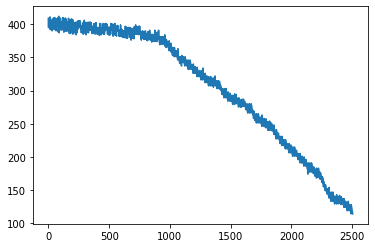

simulating macro agents
{'RiskyAvg': 0.2787286063569682, 'RiskyStd': 89.13019605578029}
Getting risky asset demand for all agents
computing aggregate buy/sell orders
Round 8 Buy/Sell: (0, nan)
{'RiskyAvg': 0.2787286063569682, 'RiskyStd': 89.13019605578029}


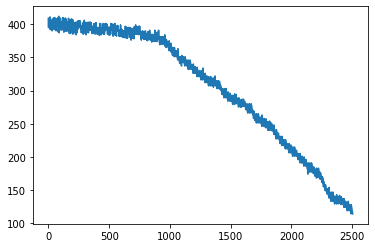

simulating macro agents
{'RiskyAvg': 0.2787286063569682, 'RiskyStd': 89.13019605578029}
Getting risky asset demand for all agents
computing aggregate buy/sell orders
Round 9 Buy/Sell: (0, nan)
{'RiskyAvg': 0.2787286063569682, 'RiskyStd': 89.13019605578029}


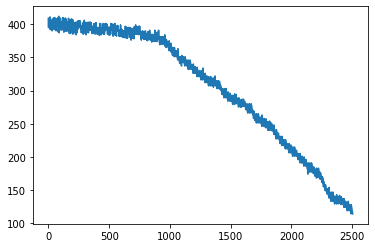

In [11]:
## List of tuples: 
##  ( parameters, (i.e. coefficient of relative risk aversion CRRA)
##    number of agents represented,
##    initial assets
agent_classes = [
    ({'CRRA': 5.0}, 100, 1000), # Normal consumers
    ({'CRRA': 6.0}, 50,  1000),  # More risk-averse consumers
    ({'CRRA': 4.0}, 50,  1000)  #  Less risk-averse consumers
]


### parameters shared by all agents
ap = {
    'aNrmInitStd' : 0.0,
    'pLvlInitMean' : 1.0, # initial distribution of permanent income
    'pLvlInitStd' : 0.0
}

# STEP 1. Initialize the agents. (and the market?)

agents = hpa.create_agents(agent_classes, ap)


# STEP 2. Create starting demand for the market.
#         Burn in the new prices.

# The initial demands for each agent
# hpa.init_prices is used to set the agent's starting
# beliefs about the price process.
init_demands = hpa.demands(agents, hpa.init_prices)

buy_sell = hpa.aggregate_buy_and_sell(
    hpa.no_demand(agents), # zero allocated to risky asset
    init_demands
)

print(f"Initial Buy/Sell: {buy_sell}")

## TODO: ABM Group reimplement the run_market method
#run_market(buy_sell)
orders = get_orders()
print(hpa.risky_expectations(orders))
    
plt.plot(orders['OrderPrice'])
plt.show()


old_demands = init_demands

# STEP 3. Run simulation for N rebalances

N = 10

for i in range(N):

    # simulate one period on the macro side
    hpa.simulate(agents, 1)
    
    hpa.update_agents(agents, orders)
    print(hpa.risky_expectations(orders))
    new_demands = hpa.demands(agents, orders)
    
    buy_sell = hpa.aggregate_buy_and_sell(
        old_demands,
        new_demands
    )
    print(f"Round {i} Buy/Sell: {buy_sell}")

    #run_market(buy_sell)
    orders = get_orders()
    print(hpa.risky_expectations(orders))
    
    plt.plot(orders['OrderPrice'])
    plt.show()
    
    old_demands = new_demands

In [12]:
agents[0].history['RiskyNow'][:,0]

array([0.27872861])

In [13]:
orders


,Tick,OrderID,OrderTime,OrderPrice,OrderTraderID,OrderQuantity,OrderBA,TraderWhoType
0,5003,3644,5002.0,409.0,8377,4.0,Sell,LiquiditySupplier
1,5005,3647,5004.0,395.0,5273,30.0,Buy,LiquidityDemander
2,5007,3649,5006.0,408.0,3490,5.0,Sell,MarketMakers
3,5007,3650,5006.0,400.0,3490,5.0,Buy,MarketMakers
4,5009,3651,5008.0,399.0,8225,35.0,Buy,LiquidityDemander
...,...,...,...,...,...,...,...,...
2502,6000,6886,5999.0,118.0,2138,0.0,Buy,MarketMakers
2503,6000,6887,5999.0,117.0,2138,0.0,Buy,MarketMakers
2504,6000,6888,5999.0,116.0,2138,0.0,Buy,MarketMakers
2505,6000,6889,5999.0,115.0,2138,0.0,Buy,MarketMakers


In [14]:
hpa.risky_expectations(prices)

NameError: name 'prices' is not defined

In [ ]:
agents[0].solution[0].ShareFuncAdj(0)

In [ ]:
agents[0].state_now['mNrmNow']

In [ ]:
agents[0].state_now['pLvlNow']

In [ ]:
new_assets(agent, hpa.risky_share, prices)

In [ ]:
orders = pd.read_csv("../PNL/out/logs/LMallorders_90_5.csv", delimiter='\t')

In [ ]:
orders

In [ ]:
plt.plot(orders['OrderPrice'])

In [ ]:
orders['TraderWhoType'].unique()

In [ ]:
sales = orders[orders['TraderWhoType'] == 'LiqSellBkr']
avg_sale_price = sales['OrderQuantity'] * sales['OrderPrice'] / sales['OrderPrice'].sum()

In [ ]:
orders[orders['TraderWhoType'] == 'LiqBuyBkr']

In [ ]:
buys = orders[orders['TraderWhoType'] == 'LiqBuyBkr]
avg_buy_price = buys['OrderQuantity'] * buys['OrderPrice'] / buys['OrderPrice'].sum()

In [ ]:
agents[0].history['mNrmNow'][0][-1] - agents[0].history['mNrmNow'][0][0]

In [ ]:
agents[2].controls['ShareNow']